In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
from sqlalchemy import create_engine, inspect

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement

Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
# Use Inspector to get column names
inspector = inspect(engine)
inspector.get_table_names()

m_columns = inspector.get_columns('measurement')
for column in m_columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [13]:
s_columns = inspector.get_columns('station')
for column in s_columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [14]:
engine.execute('SELECT * FROM station LIMIT 9').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

# Exploratory Climate Analysis

In [15]:
 # Statistical analysis
from scipy import stats
from numpy import mean

In [16]:
 # Create Database Connection
#engine = create_engine("sqlite:///Resources/hawaii.sqlite")
#Base.metadata.create_all(engine)

#from sqlalchemy.orm import Session
#session = Session(bind=engine)

Query Date:  2016-08-23


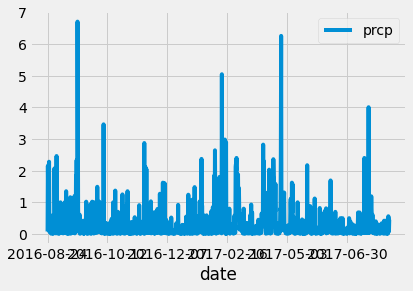

In [90]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
session.query(Measurement.date).order_by(Measurement.date.desc()).first()
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

date = dt.datetime(2016, 8, 23)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date > date).filter(Measurement.prcp).all()

results

# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(results, columns=['date', 'prcp'])

df.set_index('date', inplace=True)

df

# Sort the dataframe by date

df = df.sort_index(axis=0, level=None, ascending=True)

df

# Use Pandas Plotting with Matplotlib to plot the data

df.plot()

# df.plot.scatter(x = df.index.values, y = df['prcp'], c = 'DarkBlue', title = "Precipitation")
# plt.tight_layout()
# plt.show()

In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data

prcp_df.describe()

,prcp
count,1142.000000
mean,0.311357
std,0.576134
min,0.010000
25%,0.030000
50%,0.100000
75%,0.310000
max,6.700000


In [19]:
# Design a query to show how many stations are available in this dataset?

stations = session.query(Station.station).count()

stations

9

In [20]:
engine.execute('SELECT * FROM station LIMIT 9').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [76]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

sel = [func.count(Measurement.station)]
sel_station = session.query(*sel).group_by(Measurement.station).all()

sel_station

#sel_station

WAIKIKI = session.query(*sel).filter(Measurement.station == 'USC00519397').count()
WAIKIKI

KANEOHE = session.query(*sel).filter(Measurement.station == 'USC00513117')
KANEOHE

KUALOA_RANCH = session.query(*sel).filter(Measurement.station == 'USC00514830')
KUALOA_RANCH

PEARL_CITY = session.query(*sel).filter(Measurement.station == 'USC00517948')
PEARL_CITY

UPPER_WAHIAWA = session.query(*sel).filter(Measurement.station == 'USC00518838')
UPPER_WAHIAWA

WAIMANALO = session.query(*sel).filter(Measurement.station == 'USC00519523')
WAIMANALO

WAIHEE = session.query(*sel).filter(Measurement.station == 'USC00519281')
WAIHEE

HONOLULU = session.query(*sel).filter(Measurement.station == 'USC00511918')
HONOLULU

MANOA = session.query(*sel).filter(Measurement.station == 'USC00516128')
MANOA

print(f"WAIKIKI: {WAIKIKI}")
print(f"KANEOHE: {KANEOHE}")
print(f"KUALOA RANCH HEADQUARTERS: {KUALOA_RANCH}")
print(f"PEARL CITY: {PEARL_CITY}")
print(f"UPPER WAHIAWA: {UPPER_WAHIAWA}")
print(f"WAIMANALO EXPERIMENTAL FARM: {WAIMANALO}")
print(f"WAIHEE: {WAIHEE}")
print(f"HONOLULU OBSERVATORY: {HONOLULU}")
print(f"MANOA LYON ARBO: {MANOA}")



WAIKIKI: 1
KANEOHE: SELECT count(measurement.station) AS count_1 
FROM measurement 
WHERE measurement.station = ?
KUALOA RANCH HEADQUARTERS: SELECT count(measurement.station) AS count_1 
FROM measurement 
WHERE measurement.station = ?
PEARL CITY: SELECT count(measurement.station) AS count_1 
FROM measurement 
WHERE measurement.station = ?
UPPER WAHIAWA: SELECT count(measurement.station) AS count_1 
FROM measurement 
WHERE measurement.station = ?
WAIMANALO EXPERIMENTAL FARM: SELECT count(measurement.station) AS count_1 
FROM measurement 
WHERE measurement.station = ?
WAIHEE: SELECT count(measurement.station) AS count_1 
FROM measurement 
WHERE measurement.station = ?
HONOLULU OBSERVATORY: SELECT count(measurement.station) AS count_1 
FROM measurement 
WHERE measurement.station = ?
MANOA LYON ARBO: SELECT count(measurement.station) AS count_1 
FROM measurement 
WHERE measurement.station = ?


In [95]:
sel = [Measurement.station, func.count(Measurement.station)]
sel_station = session.query(*sel).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

sel_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [96]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
session.query(*sel).filter(Measurement.station == 'USC00519281').all()


[(54.0, 71.66378066378067, 85.0)]

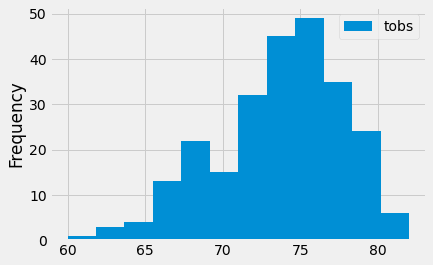

In [104]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date > date).filter(Measurement.prcp).all()

results

tobs_df = pd.DataFrame(results, columns=['tobs'])

#tobs_df.set_index('date', inplace=True)

tobs_df

tobs_df.plot.hist(bins=12)


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
